In [17]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'lines.markersize': 10
          }
pylab.rcParams.update(params)

C:\Users\Vonej\AppData\Local\Temp/ipykernel_25068/213641809.py:16: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_format = convert[format](image)


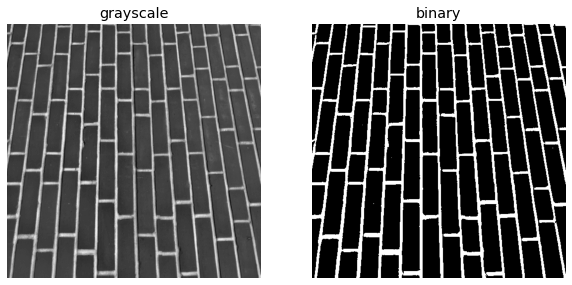

In [177]:
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte, img_as_bool, img_as_float
from skimage.exposure import histogram
from skimage import data
import skimage.color as color

convert = {
    'grayscale' : color.rgb2gray,
    'binary' : img_as_bool,
    'img_as_ubyte' : img_as_ubyte,
    'float' : img_as_float
}

def plot_img_formats(image, formats):
    fig, ax = plt.subplots(ncols=len(formats), figsize=(10, 5))
    for i, format in enumerate(formats):
        img_format = convert[format](image)
        ax[i].imshow(img_format, cmap=plt.cm.gray)
        ax[i].axis('off')
        ax[i].set_title(format)
    plt.savefig('images/formats_img.png')
    plt.show()

image = data.brick()
formats = ['grayscale', 'binary']
plot_img_formats(image, formats)

In [184]:
def grayscale_hist_plot(img):
    grayscale_image = color.rgb2gray(img)
    hist, hist_centers = histogram(grayscale_image)
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    ax[0].imshow(grayscale_image, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[1].plot(hist_centers, hist, lw=2)
    ax[1].set_title('Gray-level histogram')
    plt.show()

C:\Users\Vonej\AppData\Local\Temp/ipykernel_25068/927423808.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale_image = color.rgb2gray(img)


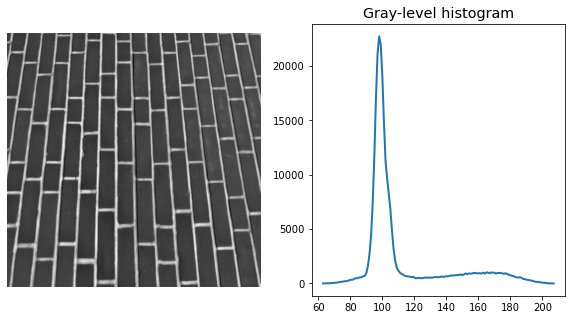

In [185]:
image = data.brick()
grayscale_hist_plot(image)

C:\Users\Vonej\AppData\Local\Temp/ipykernel_25068/927423808.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale_image = color.rgb2gray(img)


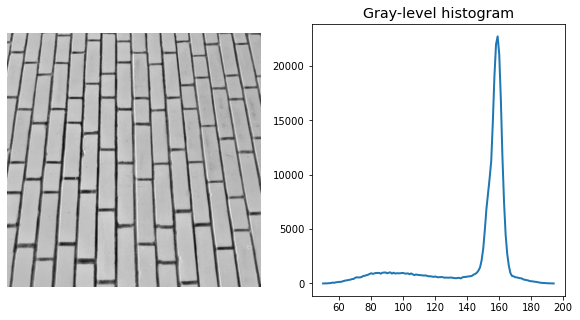

In [186]:
neg_image = 1 - image
grayscale_hist_plot(neg_image)

C:\Users\Vonej\AppData\Local\Temp/ipykernel_25068/2254308015.py:18: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = color.rgb2gray(image)


Exposure is low contrast : False


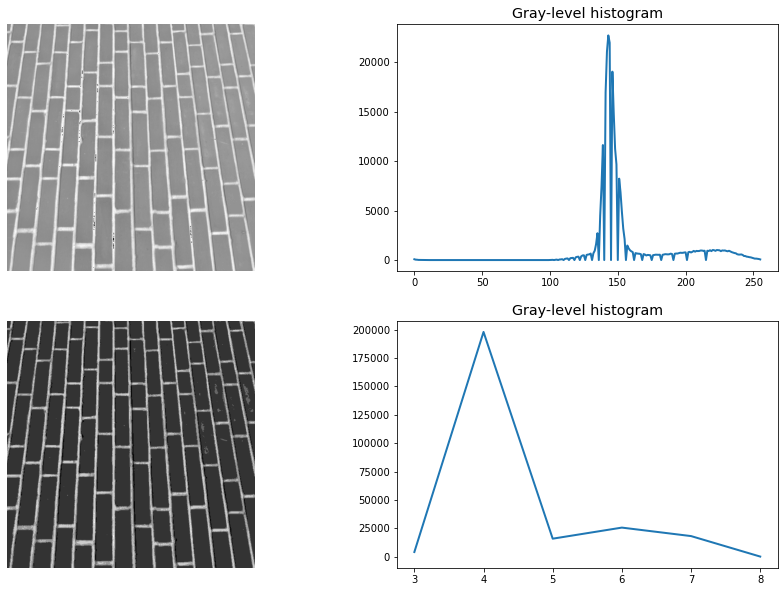

In [187]:
import skimage.exposure as exposure

def img_low_high_contrast(img, gain):
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
    for ax_img, ax_hist in ax:
        contrast = exposure.adjust_log(img, gain=gain, inv=False)
        hist, hist_centers = histogram(contrast)
        ax_img.imshow(contrast, cmap=plt.cm.gray)
        ax_img.axis('off')
        ax_hist.plot(hist_centers, hist, lw=2)
        ax_hist.set_title('Gray-level histogram')
        gain = 0.045/gain
    plt.savefig('images/log_adjust.png')
    plt.show()


image = data.brick()
image = color.rgb2gray(image)
print('Exposure is low contrast :',
    exposure.is_low_contrast(image, fraction_threshold=0.05, lower_percentile=1, upper_percentile=99))
img_low_high_contrast(image, 1.2)

In [173]:
def img_gamma_contrast(img, gamma, gain):
    fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
    contrast = img
    for ax_img, ax_hist in ax:
        hist, hist_centers = histogram(contrast)
        ax_img.imshow(contrast, cmap=plt.cm.gray)
        ax_img.axis('off')
        ax_hist.plot(hist_centers, hist, lw=2)
        ax_hist.set_title('Gray-level histogram')
        contrast = exposure.adjust_gamma(img, gamma = gamma ,gain=gain)
        gamma = 2/gamma
    plt.savefig('images/gamma_adjust.png')
    plt.show()


C:\Users\Vonej\AppData\Local\Temp/ipykernel_25068/3153482746.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = color.rgb2gray(image)


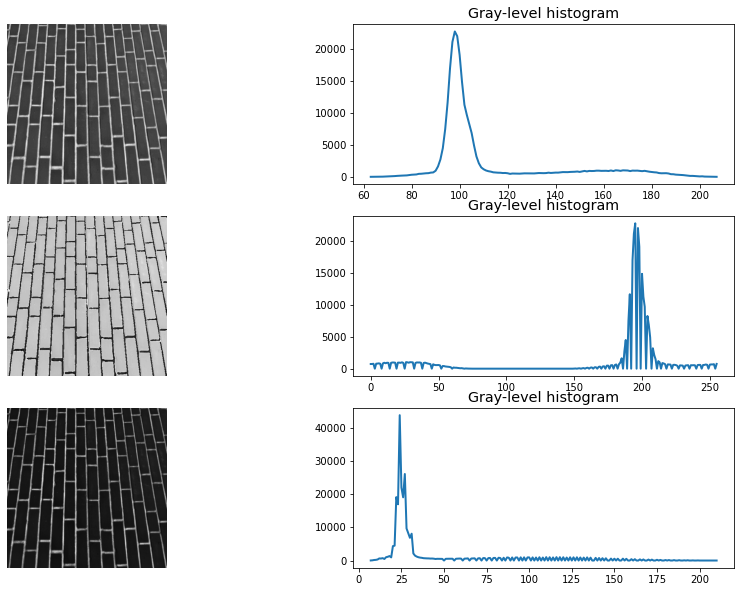

In [188]:
image = data.brick()
image = color.rgb2gray(image)
img_gamma_contrast(image, 0.7, 1.5)

C:\Users\Vonej\AppData\Local\Temp/ipykernel_25068/2405575864.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = color.rgb2gray(data.brick())


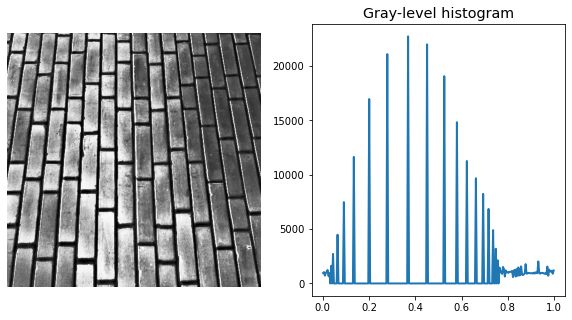

In [191]:
from skimage.exposure import equalize_hist
image = color.rgb2gray(data.brick())
D = equalize_hist (image, nbins=256)
hist, hist_centers = histogram(D)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(D, cmap=plt.cm.binary)
ax[0].axis('off')
ax[1].plot(hist_centers, hist, lw=2)
ax[1].set_title('Gray-level histogram')
plt.savefig('images/equalize.png')
plt.show()